# Day01

In [1]:
lines = [x.strip() for x in open('day01.in').readlines()]
vals = [int(x) for x in lines]

In [2]:
sum(vals)

477

In [3]:
#Part 2
t = 0
used = set([0])
done = False
while not done:
    for v in vals:
        t += v
        if t in used:
            print(t)
            done = True
            break
        used.add(t)
    

390


# Day 02

In [4]:
lines = [x.strip() for x in open('day02.in').readlines()]

In [5]:
import collections
def to_bag(s):
    d = collections.defaultdict(int)
    for i in s:
        d[i] += 1
    return d

def has_count(d, count):
    for v in d.values():
        if v == count:
            return True
    return False
bags = [to_bag(x) for x in lines]
has_two = [has_count(x, 2) for x in bags]
has_three = [has_count(x, 3) for x in bags]
sum(has_two), sum(has_three), sum(has_two) * sum(has_three)

(250, 20, 5000)

In [6]:
# Part 2
def diff_strings(s1, s2):
    return sum([x[0] != x[1] for x in zip(s1, s2)])

def same_letters(s1, s2):
    retval = ""
    for a, b in zip(s1, s2):
        if a == b:
            retval += a
    return retval

for p1 in lines:
    for p2 in lines:
        if diff_strings(p1, p2) == 1:
            print(same_letters(p1, p2))

ymdrchgpvwfloluktajxijsqb
ymdrchgpvwfloluktajxijsqb


# Day 03

In [7]:
lines = [x.strip() for x in open('day03.in').readlines()]

In [8]:
import re
def parse_line(s):
    return [int(x) for x in re.findall("\d+", s)[1:]]
parse_line(lines[0])

[265, 241, 16, 26]

In [9]:
import numpy as np
width, height = 10000, 10000
grid = np.zeros((width, height))
def mark_grid(grid, tup):
    sx, sy = tup[0], tup[1]
    dx, dy = tup[2], tup[3]
    grid[sx:sx+dx,sy:sy+dy] += 1
for l in lines:
    t = parse_line(l)
    mark_grid(grid, t)
np.sum(grid.flatten() > 1)

101781

In [10]:
# Part 2

In [11]:
def is_unique(grid, tup):
    sx, sy = tup[0], tup[1]
    dx, dy = tup[2], tup[3]
    return np.all(grid[sx:sx+dx,sy:sy+dy] == 1)
for l in lines:
    t = parse_line(l)
    if is_unique(grid, t):
        print(l)

#909 @ 593,172: 15x25


# Day 04

In [12]:
lines = [x.strip() for x in open('day04.in').readlines()]

In [13]:
lines = sorted(lines)

In [14]:
import datetime

In [15]:
datetime_object = datetime.datetime.strptime('1518-02-10 23:47', '%Y-%m-%d %H:%M')

In [16]:
datetime.timedelta(minutes=1)

datetime.timedelta(0, 60)

In [17]:
import re
def get_state(s):
    if s.find('falls') > -1:
        return "Asleep"
    if s.find('wakes') > -1:
        return "Awake"
    return re.findall("\d+", s)[0]

def get_time(s):
    return datetime.datetime.strptime(s, '%Y-%m-%d %H:%M')

def parse_line(s):
    vals = s.split('] ')
    my_time = vals[0].strip('[')
    my_state = vals[1]
    return get_time(my_time), get_state(my_state)
table = [parse_line(x) for x in lines]
table[:50]

[(datetime.datetime(1518, 2, 10, 23, 47), '631'),
 (datetime.datetime(1518, 2, 11, 0, 3), 'Asleep'),
 (datetime.datetime(1518, 2, 11, 0, 19), 'Awake'),
 (datetime.datetime(1518, 2, 12, 0, 3), '983'),
 (datetime.datetime(1518, 2, 12, 0, 9), 'Asleep'),
 (datetime.datetime(1518, 2, 12, 0, 48), 'Awake'),
 (datetime.datetime(1518, 2, 12, 23, 59), '1069'),
 (datetime.datetime(1518, 2, 13, 0, 43), 'Asleep'),
 (datetime.datetime(1518, 2, 13, 0, 55), 'Awake'),
 (datetime.datetime(1518, 2, 13, 23, 57), '587'),
 (datetime.datetime(1518, 2, 14, 0, 36), 'Asleep'),
 (datetime.datetime(1518, 2, 14, 0, 54), 'Awake'),
 (datetime.datetime(1518, 2, 15, 0, 3), '1579'),
 (datetime.datetime(1518, 2, 15, 0, 37), 'Asleep'),
 (datetime.datetime(1518, 2, 15, 0, 49), 'Awake'),
 (datetime.datetime(1518, 2, 16, 0, 3), '2179'),
 (datetime.datetime(1518, 2, 16, 0, 7), 'Asleep'),
 (datetime.datetime(1518, 2, 16, 0, 48), 'Awake'),
 (datetime.datetime(1518, 2, 16, 0, 54), 'Asleep'),
 (datetime.datetime(1518, 2, 16, 0, 

In [18]:
def fill_time(d, gaurd, state, last_time, this_time):
    if gaurd not in d:
        d[gaurd] = {}
    if state not in d[gaurd]:
        d[gaurd][state] = list()
    one_min = datetime.timedelta(minutes=1)
    while last_time < this_time:
        d[gaurd][state].append(last_time)
        last_time = last_time + one_min

d = {}
gaurd = int(table[0][1])
state = 'Awake'
last_time = table[0][0]
for line in table[1:]:
    now_time = line[0]
    try:
        new_gaurd = int(line[1])
        fill_time(d, gaurd, state, last_time, now_time)
        gaurd = new_gaurd
        state = 'Awake'
        last_time = now_time
        continue
    except:
        pass
    now_state = line[1]
    fill_time(d, gaurd, state, last_time, now_time)
    state = now_state
    last_time = now_time

        
        

In [19]:
d.keys()

dict_keys([631, 983, 1069, 587, 1579, 2179, 3331, 2837, 1021, 2971, 89, 2801, 2879, 311, 3181, 163, 2843, 2671, 3251, 3433, 2063, 3109, 2957])

In [20]:
for key in d.keys():
    if 'Asleep' not in d[key]:
        d[key]['Asleep'] = list()

In [21]:
most_sleep = max([(k,v) for k,v in d.items()], key=lambda x:len(x[1]['Asleep']))

In [22]:
most_sleep[0]

1021

In [23]:
from collections import defaultdict

minute_map = defaultdict(int)
for x in most_sleep[1]['Asleep']:
    minute_map[x.minute] += 1

In [24]:
max([(k,v) for k,v in minute_map.items()], key=lambda x: x[1])

(30, 14)

In [25]:
30*1021

30630

In [26]:
# Part 2

In [27]:
def get_most_asleep_minute(time_log):
    minute_map = defaultdict(int)
    for x in time_log['Asleep']:
        minute_map[x.minute] += 1
    if len(minute_map) == 0:
        return (0,0)
    return max([(k,v) for k,v in minute_map.items()], key=lambda x: x[1]) 

most_minute = [(k,v) for k,v in d.items()]
most_minute = [(x[0], get_most_asleep_minute(x[1])) for x in most_minute]
max(most_minute, key=lambda x: x[1][1])
    

(3331, (41, 17))

In [28]:
3331 * 41

136571

# Day 05

In [29]:
import string

In [30]:
destroy = ["".join(x) for x in zip(string.ascii_lowercase, string.ascii_uppercase)]
destroy = destroy + [x[::-1] for x in destroy]
destroy = set(destroy)

In [31]:
def reduce_str(s):
    index = 0
    new_s = ""
    while index < len(s):
        if index + 2 <= len(s) and s[index:index+2] in destroy:
            index += 2
            continue
        new_s += s[index]
        index += 1
    return new_s
        
        


In [32]:
s = open('day05.in').read().strip()
len(s)

50000

In [33]:
new_s = reduce_str(s)
while s != new_s:
    s = new_s
    new_s = reduce_str(s)

In [34]:
len(new_s)

9238

In [35]:
# Part 2

In [36]:
import re
pattern = "|".join(destroy)
def reduce_str(s):
    return re.sub(pattern, "", s)

In [37]:
def full_reduce(s, replace):
    s = s.replace(replace, "")
    s = s.replace(replace.upper(), "")
    new_s = reduce_str(s)
    while s != new_s:
        s = new_s
        new_s = reduce_str(s)
    return new_s, replace

In [38]:
s = open('day05.in').read().strip()
all_patterns = []
for x in string.ascii_lowercase:
    retval = full_reduce(s, x)
    all_patterns.append(retval)

In [39]:
len(min(all_patterns, key=lambda x: len(x[0]))[0])

4052

# Day 06

In [40]:
nodes = [[int(y) for y in x.strip().split(',')] for x in open('day06.in').readlines()]

In [41]:
def distance(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def mark_closest(point, nodes, grid):
    for i, node in enumerate(nodes):
        dist = distance(point, node)
        if dist < grid[point][1]:
            grid[point] = (i, dist)

grid = {}
for x in range(-200, 500):
    for y in range(-200, 500):
        grid[(x,y)] = (-1, 100000000)
        
for x in range(-200, 500):
    for y in range(-200, 500):
        mark_closest((x,y), nodes, grid)
         

In [42]:
## Anything on the Edge is infinite

In [43]:
whitelist = set()
for y in range(-200, 500):
    closest = grid[(-200, y)]
    whitelist.add(closest[0])
    closest = grid[(499, y)]
    whitelist.add(closest[0])
    closest = grid[(y, -200)]
    whitelist.add(closest[0])
    closest = grid[(y, 499)]
    whitelist.add(closest[0])
    

In [44]:
count_squares = defaultdict(int)
for x in range(-200, 500):
    for y in range(-200, 500):
        p = grid[(x,y)]
        if p[0] in whitelist:
            continue
        count_squares[p[0]] += 1

In [45]:
max([(k,v) for k,v in count_squares.items()], key=lambda x: x[1])

(40, 3840)

In [46]:
len(nodes)

50

In [47]:
## Part 2

In [48]:
def sum_distances(point, nodes, grid):
    for i, node in enumerate(nodes):
        dist = distance(point, node)
        grid[point] += dist

grid = {}
for x in range(-500, 500):
    for y in range(-500, 500):
        grid[(x,y)] = 0
        
for x in range(-500, 500):
    for y in range(-500, 500):
        sum_distances((x,y), nodes, grid)

In [49]:
## Check if we made our grid large enough
for y in range(-500, 500):
    closest = grid[(-500, y)]
    if closest < 1000:
        print("Broken", closest)
    closest = grid[(499, y)]
    if closest < 1000:
        print("Broken", closest)
    closest = grid[(y, -500)]
    if closest < 1000:
        print("Broken", closest)
    closest = grid[(y, 499)]
    if closest < 1000:
        print("Broken", closest)

In [50]:
total_spaces = 0
for x in range(-500, 500):
    for y in range(-500, 500):
        if grid[(x,y)] < 10000:
            total_spaces += 1
total_spaces

46542

# Day 07

In [58]:
import re
import networkx as nx

In [59]:
lines = [x.strip().split() for x in open('day07.in').readlines()]

In [60]:
def line_to_instr(l):
    return l[1], l[-3]

In [61]:
instrs = [line_to_instr(x) for x in lines]

In [62]:
g = nx.DiGraph()
for my_from, my_to in instrs:
    g.add_edge(my_from, my_to)

In [63]:
"".join(list(nx.lexicographical_topological_sort(g))), len(list(nx.lexicographical_topological_sort(g)))

('SCLPAMQVUWNHODRTGYKBJEFXZI', 26)

In [64]:
## Part 2 Ignore everything and assume we have concurrency we need
## Just compute time for longest path through the DAG

In [65]:
import string
time_lookup = {x[0]: x[1] for x in zip(string.ascii_uppercase, range(1, 100))}

In [66]:
g = nx.DiGraph()
for my_from, my_to in instrs:
    g.add_edge(my_from, my_to, weight=time_lookup[my_from] + 60)

In [67]:
path = nx.dag_longest_path(g, weight='weight')

In [68]:
total_time = 0
for n in path:
    total_time += time_lookup[n] + 60
total_time

1234

# Day 08

In [69]:


class Node(object):
    def __init__(self, l, start_index):
        self.start_index = start_index
        num_children = l[start_index]
        num_metadata = l[start_index+1]
        
        cur_index = start_index+2
        self.children = []
        for child_num in range(num_children):
            child = Node(l, cur_index)
            cur_index = child.end_index+1
            self.children.append(child)
        
        self.metadata = []
        for metadata in range(num_metadata):
            self.metadata.append(l[cur_index])
            cur_index += 1
        self.end_index = cur_index - 1
        
    def sum_metadata(self):
        my_total = sum(self.metadata)
        for child in self.children:
            my_total += child.sum_metadata()
        return my_total
    
    
    def special_sum(self):
        if len(self.children) == 0:
            return sum(self.metadata)
        total = 0
        for index in self.metadata:
            index = index - 1
            if index < 0:
                continue
            if index >= len(self.children):
                continue
            total += self.children[index].special_sum()
        return total
        

In [70]:
l = [x.strip().split() for x in open('day08.in').readlines()]
l = [int(x) for x in l[0]]

In [71]:
root = Node(l, 0)

In [72]:
root.sum_metadata()

43825

In [73]:
root.special_sum()

19276

# Day 09

In [74]:
from collections import deque

In [75]:
import re
inp = "419 players; last marble is worth 71052 points"

In [76]:
n_players, last_marble = [int(x) for x in re.findall("\d+", inp)]

In [77]:
def play_game(n_players, last_marble):
    scores = defaultdict(int)
    ring = deque()
    ring.append(0)
    ring.append(2)
    ring.append(1)
    ring.append(3)

    marble_num = 3
    player_num = 2
    while marble_num <= last_marble:
        marble_num += 1
        player_num += 1
        player_num = player_num % n_players
        
        if marble_num % 23 == 0:
            scores[player_num] += marble_num
            ring.rotate(7)
            v = ring.pop()
            scores[player_num] += v
            ring.rotate(-1)
            continue
        ring.rotate(-1)
        ring.append(marble_num)
        
    return scores

In [78]:
print(max([x for x in play_game(n_players, last_marble).values()]))

412117


In [79]:
## Part 2
print(max([x for x in play_game(n_players, last_marble*100).values()]))

3444129546


# Day 10

In [80]:
lines = [x.strip() for x in open('day10.in').readlines()]
def get_point_from_str(s):
    x, y, dx, dy = [int(x) for x in re.findall(r"[+-]?\d+", s)]
    return (x,y), (dx, dy)
points = [get_point_from_str(x) for x in lines]

In [81]:
def bounding_box(points):
    min_x = min([x[0][0] for x in points])
    max_x = max([x[0][0] for x in points])
    min_y = min([x[0][1] for x in points])
    max_y = max([x[0][1] for x in points])
    area = abs(max_x - min_x) * abs(max_y - min_y)
    return area, (min_x, min_y), (max_x, max_y)

def step(x):
    return (x[0][0] + x[1][0], x[0][1] + x[1][1]), x[1]

In [82]:
step_list = []
for i in range(15000):
    points = [step(x) for x in points]
    bbox = bounding_box(points)
    step_list.append((bbox, points))

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

In [84]:
bbox_areas = []
for entry in step_list:
    bbox_areas.append(entry[0][0])

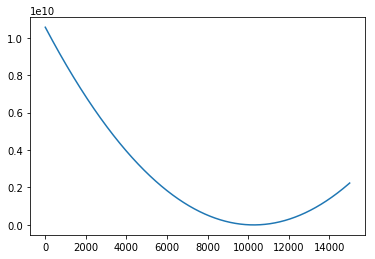

In [85]:
plt.plot(bbox_areas)

In [86]:
step_list = sorted(step_list, key=lambda x:x[0][0])

In [87]:
def display_points(points):
    min_x = min([x[0][0] for x in points])
    max_x = max([x[0][0] for x in points])
    min_y = min([x[0][1] for x in points])
    max_y = max([x[0][1] for x in points])
    used = set([x[0] for x in points])
    s = ""
    for r in range(min_y, max_y+1):
        for c in range(min_x, max_x+1):
            if (c, r) in used:
                s += "#"
            else:
                s += "."
        s += "\n"
    print(s)

In [88]:
display_points(step_list[0][1])

.####...######..#....#..#....#...####....####....####...#....#
#....#..#.......##...#..#...#...#....#..#....#..#....#..#....#
#.......#.......##...#..#..#....#.......#.......#.......#....#
#.......#.......#.#..#..#.#.....#.......#.......#.......#....#
#.......#####...#.#..#..##......#.......#.......#.......######
#..###..#.......#..#.#..##......#.......#..###..#..###..#....#
#....#..#.......#..#.#..#.#.....#.......#....#..#....#..#....#
#....#..#.......#...##..#..#....#.......#....#..#....#..#....#
#...##..#.......#...##..#...#...#....#..#...##..#...##..#....#
.###.#..#.......#....#..#....#...####....###.#...###.#..#....#



In [89]:
# Part 2

In [90]:
target_bbox = step_list[0][0][0]

In [91]:
lines = [x.strip() for x in open('day10.in').readlines()]
def get_point_from_str(s):
    x, y, dx, dy = [int(x) for x in re.findall(r"[+-]?\d+", s)]
    return (x,y), (dx, dy)
points = [get_point_from_str(x) for x in lines]

In [92]:
step_list = []
for i in range(1, 15000):
    points = [step(x) for x in points]
    bbox = bounding_box(points)
    if bbox[0] == target_bbox:
        print(i)
        break

10274


# Day 11

In [93]:
serial = 8868

In [94]:
def get_power_raw(x, y, serial):
    a = x + 10
    rack_power = a
    a = a * y
    a  = a + serial
    a = a * rack_power
    a = a // 100 
    a = a % 10
    a = a - 5
    return a

In [95]:
get_power_raw(3,5,8)

4

In [96]:
get_power_raw(122,79,57)

-5

In [97]:
get_power_raw(217,196,39)

0

In [98]:
get_power_raw(101,153,71)

4

In [99]:
grid = {}
for i in range(1,301):
    for j in range(1,301):
        grid[(i,j)] = get_power_raw(i,j,serial)

In [100]:
def get_power_grid(i,j,grid):
    total = 0
    for dx in range(0,3):
        for dy in range(0,3):
            p = (i+dx, j+dy)
            if p not in grid:
                return -100
            total += grid[p]
    return total

powers = []
for i in range(1, 301):
    for j in range(1, 301):
        powers.append(((i,j), get_power_grid(i,j,grid) ))

In [101]:
powers = sorted(powers,key=lambda x: x[1], reverse=True)

In [102]:
powers[0]

((241, 40), 30)

In [103]:
# Part 2

In [104]:
def get_power_grid(i,j,grid,size):
    total = 0
    mx = i + size
    my = j + size
    if mx > 300 or my > 300:
        return - 100
    return np.sum(grid[i:mx,j:my])

In [105]:
import numpy as np
np_grid = np.zeros(shape=(301,301))
for i in range(1,301):
    for j in range(1, 301):
        np_grid[i][j] = grid[(i,j)]

In [107]:
powers = []
for k in range(2,301):
    if k % 50 == 0:
        print(k)
    for i in range(1, 301):
        for j in range(1, 301):        
            powers.append(((i,j,k), get_power_grid(i,j,np_grid,k)))

50
100
150
200
250
300


In [108]:
powers = sorted(powers,key=lambda x: x[1], reverse=True)
powers[0]

((166, 75, 12), 71.0)

# Day 12

In [109]:
initial_state = "###.......##....#.#.#..###.##..##.....#....#.#.....##.###...###.#...###.###.#.###...#.####.##.#....#"
initial_state = "."*100 + initial_state + "."*100

In [110]:
initial_state

'....................................................................................................###.......##....#.#.#..###.##..##.....#....#.#.....##.###...###.#...###.###.#.###...#.####.##.#....#....................................................................................................'

In [111]:
moves = """..... => .
#..## => .
..### => #
..#.# => #
.#.#. => .
####. => .
##.## => #
#.... => .
#...# => .
...## => .
##..# => .
.###. => #
##### => #
#.#.. => #
.##.. => #
.#.## => .
...#. => #
#.##. => #
..#.. => #
##... => #
....# => .
###.# => #
#..#. => #
#.### => #
##.#. => .
###.. => #
.#### => .
.#... => #
..##. => .
.##.# => .
#.#.# => #
.#..# => ."""

In [112]:
moves = [x.strip().split(" => ") for x in moves.split("\n")]

In [113]:
def generation(state, moves):
    move_map = {x[0]:x[1] for x in moves}
    new_state = ".."
    for i in range(2, len(state) - 3):
        strip = state[i-2:i+3]
        if strip not in move_map:
            raise ValueError(strip)
        new_state += move_map[strip]
    new_state += ".."
    return new_state

In [114]:
new_state = initial_state
for i in range(20):
    new_state = generation(new_state, moves)
num_on = [x for x in new_state if x == "#"]
print(len(num_on))

47


In [115]:
start_value = -100
total = 0
for i, c in enumerate(new_state):
    if c == '#':
        total += start_value
    start_value += 1

In [116]:
total, start_value

(3221, 180)

In [117]:
## Part 2

In [118]:
initial_state = "###.......##....#.#.#..###.##..##.....#....#.#.....##.###...###.#...###.###.#.###...#.####.##.#....#"
initial_state = "."*1000 + initial_state + "."*1000

In [119]:
def calc_total(new_state):
    start_value = -1000
    total = 0
    for i, c in enumerate(new_state):
        if c == '#':
            total += start_value
        start_value += 1
    return total
        
new_state = initial_state
for i in range(401):
    new_state = generation(new_state, moves)
    num_on = [x for x in new_state if x == "#"]
    if i > 390:
        print(i, calc_total(new_state))

391 22256
392 22308
393 22360
394 22412
395 22464
396 22516
397 22568
398 22620
399 22672
400 22724


In [120]:
(50000000000 - 400) * (22724 - 22672) + 22672

2600000001872

# Day 13

In [121]:
dirs = {
    "DOWN": (1,0),
    "UP": (-1, 0),
    "RIGHT": (0, 1),
    "LEFT": (0, -1)
}

turn_lookup = {
    "LEFT": {
        "DOWN": "RIGHT",
        "UP": "LEFT",
        "RIGHT": "UP",
        "LEFT": "DOWN"
    },
    "STRAIGHT": {
        "DOWN":"DOWN",
        "UP": "UP",
        "RIGHT": "RIGHT",
        "LEFT": "LEFT"
    },
    "RIGHT": {
        "DOWN": "LEFT",
        "UP": "RIGHT",
        "RIGHT": "DOWN",
        "LEFT": "UP",
    }
}

curve_changes = {
    "\\": {
        "DOWN": "RIGHT",
        "LEFT": "UP",
        "UP": "LEFT",
        "RIGHT": "DOWN",
    },
    "/": {
        "DOWN": "LEFT",
        "LEFT": "DOWN",
        "UP": "RIGHT",
        "RIGHT": "UP",
    }
}

turn_order = [
    "LEFT",
    "STRAIGHT",
    "RIGHT",
]
cart_characters = [">", "<", "^", "v"]
curves = ["\\", "/"]

class Cart(object):
    def __init__(self, p, s, board):
        if s == ">":
            self.direction = "RIGHT"
        if s == "<":
            self.direction = "LEFT"
        if s == "^":
            self.direction = "UP"
        if s == "v":
            self.direction = "DOWN"
        self.location = p
        self.turn = 0
        self.board = board
        self.dead = False
    
    def move(self):
        dy, dx = dirs[self.direction]
        location = self.location[0] + dy, self.location[1] + dx
        self._handle_turn(location)
        self._handle_intersection(location)
        self.location = location
    
    def _handle_turn(self, location):
        tile = self.board[location[0]][location[1]]
        if tile not in curves:
            return
        self.direction = curve_changes[tile][self.direction]
        
    def _handle_intersection(self, location):
        tile = self.board[location[0]][location[1]]
        if tile != "+":
            return
        turn_str = turn_order[self.turn]
        self.direction = turn_lookup[turn_str][self.direction]
        self.turn = self.turn + 1
        self.turn = self.turn % len(turn_order)
        
def sort_carts(carts):
    carts = sorted(carts, key=lambda x: (x.location[0], x.location[1]))
    return carts

def is_collision(carts):
    for i in range(len(carts)):
        for j in range(i+1, len(carts)):
            c1 = carts[i]
            c2 = carts[j]
            if c1.location == c2.location:
                return True, c1.location
    return False, None


def print_board(board, carts):
    cart_locs = set([x.location for x in carts])
    s = ""
    for y in range(len(board)):
        for x in range(len(board[0])):
            if (y,x) in cart_locs:
                s += "*"
            else:
                s += board[y][x]
        s += "\n"
    print(s)


In [122]:
def read_carts(fname):
    board = [list(x.strip("\n")) for x in open(fname).readlines()]
    carts = []
    for y in range(len(board)):
        for x in range(len(board[0])):
            if board[y][x] in cart_characters:
                carts.append(Cart((y,x), board[y][x], board))
                if board[y][x] in ["^", "v"]:
                    board[y][x] = "|"
                else:
                    board[y][x] = "-"
    return carts, board

In [123]:
carts, board = read_carts('day13.sample')
for i in range(20):
    for cart in carts:
        cart.move()
    if is_collision(carts)[0]:
        print("Collision")
        break
    sort_carts(carts)
is_collision(carts)

Collision


(True, (3, 7))

In [124]:
import json

def solve_day13(carts, board):
    while True:
        carts = sort_carts(carts)
        for cart in carts:
            cart.move()
            if is_collision(carts)[0]:
                return is_collision(carts)
carts, board = read_carts('day13.in')
solve_day13(carts, board)

(True, (104, 82))

In [125]:
# Part 2

In [126]:
def mark_dead(carts):
    for i in range(len(carts)):
        for j in range(i+1, len(carts)):
            c1 = carts[i]
            c2 = carts[j]
            if c1.dead or c2.dead:
                continue
            if c1.location == c2.location:
                c1.dead = True
                c2.dead = True
def one_cart_left(carts):
    carts = [x for x in carts if not x.dead]
    return len(carts) == 1

In [128]:
def solve_day13_part2(carts, board):
    while True:
        carts = sort_carts(carts)
        for cart in carts:
            cart.move()
            mark_dead(carts)
        if one_cart_left(carts):
            return [x.location for x in carts if not x.dead]
carts, board = read_carts('day13.sample2')
solve_day13_part2(carts, board)

[(4, 6)]

In [129]:
carts, board = read_carts('day13.in')
solve_day13_part2(carts, board)

[(22, 121)]

# Day 14

In [130]:
inp = 824501

In [131]:
def make_round(l, i1, i2):
    new = l[i1] + l[i2]
    if new >= 10:
        l.append(new // 10)
    l.append(new % 10)
    i1 = i1 + 1 + l[i1]
    i2 = i2 + 1 + l[i2]
    i1 = i1 % len(l)
    i2 = i2 % len(l)
    return l, i1, i2

l = [3, 7]
i1 = 0
i2 = 1
for i in range(inp+ 20):
    l, i1, i2 = make_round(l, i1, i2)


In [132]:
l[9:19]

[5, 1, 5, 8, 9, 1, 6, 7, 7, 9]

In [133]:
"".join([str(x) for x in l[inp:inp+10]])

'1031816654'

In [134]:
# part 2

In [135]:
s = "".join([str(x) for x in l])

In [136]:
s.find(str(inp))

-1

In [137]:
for i in range(inp*100):
    l, i1, i2 = make_round(l, i1, i2)


In [138]:
def check_l(l, inp):
    s = "".join([str(x) for x in l])
    return s.find(str(inp))
check_l(l, inp)

20179839

In [139]:
del l

# Day 16

In [130]:
def addr(a, b, c, r):
    r[c] = r[a] + r[b]
    
def addi(a, b, c, r):
    r[c] = r[a] + b
    
def mulr(a, b, c, r):
    r[c] = r[a] * r[b]
    
def muli(a, b, c, r):
    r[c] = r[a] * b
    
def banr(a, b, c, r):
    r[c] = r[a] & r[b]
    
def bani(a, b, c, r):
    r[c] = r[a] & b
    
def borr(a, b, c, r):
    r[c] = r[a] | r[b]
    
def bori(a, b, c, r):
    r[c] = r[a] | b
    
def setr(a, b, c, r):
    r[c] = r[a]
    
def seti(a, b, c, r):
    r[c] = a
    
def gtir(a, b, c, r):
    if a > r[b]:
        r[c] = 1
        return
    r[c] = 0
    
def gtri(a, b, c, r):
    if r[a] > b:
        r[c] = 1
        return
    r[c] = 0
    
def gtrr(a, b, c, r):
    if r[a] > r[b]:
        r[c] = 1
        return
    r[c] = 0
    
def eqir(a, b, c, r):
    if a == r[b]:
        r[c] = 1
        return
    r[c] = 0
    
def eqri(a, b, c, r):
    if r[a] == b:
        r[c] = 1
        return
    r[c] = 0

def eqrr(a, b, c, r):
    if r[a] == r[b]:
        r[c] = 1
        return
    r[c] = 0
    
fns = [addr, addi, mulr, muli, banr, bani, borr, bori, setr, seti, gtir, gtri, gtrr, eqir, eqri, eqrr]

In [117]:
import json
cmds = []
index = 0
lines = open('day16.in').readlines()
while index < len(lines):
    p1 = json.loads(lines[index].strip().strip("Before: "))
    index += 1
    ops = [int(x) for x in lines[index].strip().split()]
    index += 1
    p2 = json.loads(lines[index].strip("After: "))
    cmds.append([p1, ops, p2])
    index += 2

In [118]:
def check_cmd(cmd):
    total = 0
    before, c, after = cmd
    for fn in fns:
        try:
            test_regs = list(before)
            fn(c[1], c[2], c[3], test_regs)
            if test_regs == after:
                total += 1
        except:
            pass
    return total >= 3
        


In [119]:
check_cmd([[3,2,1,1], [9,2,1,2], [3,2,2,1]])

True

In [120]:
sum([check_cmd(x) for x in cmds])

642

In [121]:
#part 2

In [122]:
def poss_cmds(cmd):
    total = 0
    before, c, after = cmd
    poss = []
    for fn in fns:
        try:
            test_regs = list(before)
            fn(c[1], c[2], c[3], test_regs)
            if test_regs == after:
                poss.append(fn.__name__)
        except:
            pass
    return c[0], poss

In [123]:
all_pos = [poss_cmds(x) for x in cmds]
print(len(all_pos))

790


In [124]:
d = {}
for num, poss in all_pos:
    poss = set(poss)
    if num not in d:
        d[num] = poss
        continue
    intersect = d[num].intersection(poss)

In [166]:
import networkx as nx
g = nx.Graph()
for k, v in d.items():
    for elem in v:
        g.add_edge(k, elem, capacity=1)  

In [168]:
matches = nx.algorithms.bipartite.matching.hopcroft_karp_matching(g)

In [129]:
lines = [x.strip().split() for x in open('day16.in2').readlines()]
lines = [[int(y) for y in x] for x in lines]

In [111]:
name_to_fn = {x.__name__:x for x in fns}

In [169]:
register = [0,0,0,0]
for line in lines:
    fn_name = matches[line[0]]
    fn = name_to_fn[fn_name]
    fn(line[1], line[2], line[3], register)

In [170]:
register

[481, 481, 3, 0]

# Day 17

In [20]:
import re
def update_grid(d, s):
    i1, i2, i3 = [int(x) for x in re.findall(r"\d+", s)]
    if s[0] == 'y':
        y = i1
        for x in range(i2, i3+1):
            d[(y, x)] = "#"
    if s[0] == 'x':
        x = i1
        for y in range(i2, i3+1):
            d[(y, x)] = "#"
            
def read_grid(fname):
    lines = [x.strip() for x in open(fname).readlines()]
    d = {}
    for line in lines:
        update_grid(d, line)
    return d

def get_max_y(d):
    max_y = max([x for x in d.items()], key=lambda x: x[0])[0][0]
    return max_y

In [21]:
def get_min_max_x(d):
    all_x = set()
    for k in d.keys():
        all_x.add(k[1])
    start_x = 500
    max_x = start_x
    min_x = start_x
    while max_x in all_x:
        max_x += 1
    while min_x in all_x:
        min_x -= 1
    return min_x, max_x
min_x, max_x = get_min_max_x(d)
min_x, max_x

(412, 578)

In [30]:
def get_moves(d, p, bbox):
    max_y, min_x, max_x = bbox
    y,x = p
    down = (y+1, x)
    left = (y, x-1)
    right = (y, x+1)
    poss = []
    for m in [down, left, right]:
        if m[0] > max_y:
            continue
        if m[1] > max_x or m[1] < min_x:
            continue
        if m in d and d[p] in ["#", "|"]:
            continue
        if m not in d:
            poss.append(m)
    return poss

def dfs(d, p, bbox):
    d[p] = "|"
    moves = get_moves(d, p, bbox)
    for move in moves:
        dfs(d, move, bbox)

def solve(fname):
    d = read_grid(fname)
    max_y = get_max_y(d)
    min_x, max_x = get_min_max_x(d)
    dfs(d, (1, 500), (max_y, min_x, max_x))
    return len([x for x in d.values() if x == '|'])
    
        


In [31]:
solve('day17.sample')

124